# FORMULACIÓN DEL MODELO DE OPTIMIZACIÓN

La formulación del modelo se basa en la representación matemática de las relaciones entre actores de la red planteada. Para esto se formula un algoritmos de programación lineal de enteros mixtos (MILP) que contemple el problema de asignación de cantidad optima de cada tipo de queso y operación de agentes dentro de la red, para llegar a la modelación definitiva se lleva a cabo las distintas pruebas de funcionalidad con el fin de validad cada una de las restricciones, supuestos y variables de salida, con el fin de verificar la validez de los resultados. 

## Modelo de optimización

### 1. Importa la librería 

In [1]:
# Instalando biblioteca pyomo y GLPK
# Instalando Pyomo
# pip3 install pyomo
# pip3 install pandas

In [2]:

import pandas as pd
from pyomo.environ import*
import pyomo.environ as pyo

### 2. Crea un modelo de Pyomo 

In [3]:
# Crear un modelo abstracto con Pyomo
modelo = pyo.AbstractModel()

### 3. Cargamos los parametros

In [4]:
# Cargar datos desde archivos CSV
# Asumiendo que tienes archivos CSV llamados 'costo_produccion.csv', 'costo_fijo_acopio.csv', etc.
# Ajusta los nombres de archivos según tus necesidades

productores_df = pd.read_csv('Productores.csv', index_col='Productores')
centros_de_acopios_df = pd.read_csv('CAcopios.csv', index_col='CAcopios')
clientes_df = pd.read_csv('Clientes.csv', index_col='Clientes')
productos_df = pd.read_csv('Productos.csv', index_col='Productos')
periodo_de_tiempo_df = pd.read_csv('Tiempo.csv', index_col='Tiempo')

costo_produccion_df = pd.read_csv('CostoProduccion.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_fijo_acopio_df = pd.read_csv('CostoFijoAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_var_acopio_df = pd.read_csv('CostoVarAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_inv_acopio_df = pd.read_csv('CostoInvAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_trans_prod_acopio_df = pd.read_csv('CostoTransProdAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_trans_acopio_clie_df = pd.read_csv('CostoTransAcopioClie.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
demanda_clie_df = pd.read_csv('DemandaClie.csv', delimiter=';', decimal=',', encoding='utf-8-sig') 
cap_productor_df = pd.read_csv('CapProductor.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
cap_almacenamientoCA_df = pd.read_csv('CapAlmacenamientoCA.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
productos_dinsatisfecha_df = pd.read_csv('PDinsatisfecha.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  

# Convertir los DataFrames a diccionarios
costo_produccion_dict = {(row['Productos'], row['Productores'], row['Tiempo']): row['CostoProduccion'] for _, row in costo_produccion_df.iterrows()}
costo_fijo_acopio_dict = {(row['CAcopios'], row['Tiempo']): row['CostoFijoAcopio'] for _, row in costo_fijo_acopio_df.iterrows()}
costo_var_acopio_dict = {(row['Productos'], row['CAcopios'], row['Tiempo']): row['CostoVarAcopio'] for _, row in costo_var_acopio_df.iterrows()}
costo_inv_acopio_dict = {(row['Productos'], row['CAcopios'], row['Tiempo']): row['CostoInvAcopio'] for _, row in costo_inv_acopio_df.iterrows()}
costo_trans_prod_acopio_dict = {(row['Productos'], row['Productores'], row['CAcopios'], row['Tiempo']): row['CostoTransProdAcopio'] for _, row in costo_trans_prod_acopio_df.iterrows()}
costo_trans_acopio_clie_dict = {(row['Productos'], row['Productores'], row['Clientes'], row['Tiempo']): row['CostoTransAcopioClie'] for _, row in costo_trans_acopio_clie_df.iterrows()}
demanda_clie_dict = {(row['Productos'], row['Clientes'], row['Tiempo']): row['DemandaClie']  for _, row in demanda_clie_df.iterrows()}
cap_productor_dict = {(row['Productos'], row['Productores'], row['Tiempo']): row['CapProductor']  for _, row in cap_productor_df.iterrows()}
cap_almacenamientoCA_dict = {(row['Productos'], row['CAcopios'], row['Tiempo']): row['CapAlmacenamientoCA']  for _, row in cap_almacenamientoCA_df.iterrows()}
productos_dinsatisfecha_dict = {(row['Productos'], row['Tiempo']): row['PDinsatisfecha']  for _, row in productos_dinsatisfecha_df.iterrows()}


In [5]:
# Antes de la creación de los conjuntos, agrega estas líneas
print("Claves de los conjuntos:")
print("Productores:", productores_df.index)
print("Centros de acopios:", centros_de_acopios_df.index)
print("Clientes:", clientes_df.index)
print("Productos:", productos_df.index)
print("Periodo de tiempo:", periodo_de_tiempo_df.index)

# Luego de la creación de los diccionarios, agrega estas líneas
print("\nClaves de los diccionarios:")
print("CostoProduccion:", costo_produccion_dict.keys())
print("CostoFijoAcopio:", costo_fijo_acopio_dict.keys())
print("CostoVarAcopio:", costo_var_acopio_dict.keys())
print("CostoInvAcopio:", costo_inv_acopio_dict.keys())
print("CostoTransProdAcopio:", costo_trans_prod_acopio_dict.keys())
print("CostoTransAcopioClie:", costo_trans_acopio_clie_dict.keys())
print("DemandaClie:", demanda_clie_dict.keys())
print("CapProductor:", cap_productor_dict.keys())
print("CapAlmacenamientoCA:", cap_almacenamientoCA_dict.keys())

Claves de los conjuntos:
Productores: Index(['LUIS MANUEL MEDINA TORRES', 'JUAN LORENZO DUARTE',
       'SEBASTIAN MANUEL ALCALA CANTILLO', 'WILSON ALFREDO IBARRA DELUQUE',
       'ENDER NICOLAS CABRALES', 'NATIVIDAD RIVEIRA', 'MARITZA LEON VANEGAS',
       'OLGA DAZA IBARRA', 'CARLOS ALBERTO GUTIERREZ',
       'GUSTAVO CONTRERAS PEREZ', 'RAFAEL VALMIRO PINTO SAURITH',
       'CARLOS ALBERTO ACOSTA ULBINA', 'NEVIS FLOREZ TORRES',
       'FLORENTINO GUERRA ANAYA', 'ALVARO DE JESUS GUERRA AMAYA',
       'JUAN BARRIOS', 'NEFER ORTIZ', 'YOLMIS AMAYA ORTIZ',
       'ANTONIO MARÍA PACHECO', 'ANDRES DE JESUS LLERENA PEREZ',
       'MANUEL ANTONIO GOMEZ FLOREZ', 'MANUEL JOSE BORRERO SANCHEZ',
       'CARMEN RODRIGUEZ GAMEZ', 'VICTOR DANIEL FUENTES SAJUTH',
       'CARLOS RAFAEL GUERRA URIBIA', 'ALEXANDER VASQUEZ ROMERO',
       'HERMES VAZQUEZ', 'LUIS AGUSTIN MAESTRE', 'MERITH MURGAS',
       'DALHIS MARIA HERNANDEZ BARRETO', 'MIRIAM MIRANDA',
       'EDILBERTO DAZA CORDOBA', 'OSCAR GAMEZ ARIZ

### 4. Conjuntos

| Término | Descripción                    |
|---------|--------------------------------|
| I       | Conjunto de productores        |
| J       | Conjunto de centros de acopio  |
| K       | Conjunto de clientes           |
| P       | Conjunto de productos          |
| T       | Conjunto de periodos de tiempo |


In [6]:

modelo.productores = pyo.Set(initialize=productores_df.index)  # Conjunto I de productores
modelo.centros_de_acopios = pyo.Set(initialize=centros_de_acopios_df.index)  # Conjunto J de centros de acopio
modelo.clientes = pyo.Set(initialize=clientes_df.index)  # Conjunto K de clientes
modelo.productos = pyo.Set(initialize=productos_df.index)  # Conjunto P de productos
modelo.periodo_de_tiempo = pyo.Set(initialize=periodo_de_tiempo_df.index)  # Conjunto T de periodos de tiempo

### 5. Parámetros 

| Término                       | Descripción                                                                       | Unidades    |
|-------------------------------|-----------------------------------------------------------------------------------|-------------|
| Costos de producción          |                                                                               |             |
| $CostoProducción_{pit}$        | Costo de producción del producto p en el productor i en el periodo de tiempo t    | [$/kg]      |
| Costos de operación           |                                                                               |             |
| $CostoFijoAcopi_{jt}$         | Costo fijo del centro de acopio j en el periodo de tiempo t                        | [$]         |
| $CostoVarAcopio_{pjt}$         | Costo variable del producto p en el centro de acopio j en el periodo de tiempo t  | [$/kg]      |
| Costos de inventario          |                                                                               |             |
| $CostoInvAcopio_{pjt}$         | Costo de inventario del producto p en el centro de acopio j en el periodo de tiempo t | [$/kg]   |
| Costos de transporte          |                                                                               |             |
| $CostoTransProdAcopi_{pijt}$  | Costo de transporte del producto p desde el productor i hasta el centro de acopio j en el periodo de tiempo t | [$/kg] |
| $CostoTransAcopioClie_{pjkt}$  | Costo de transporte del producto p desde el centro de acopio j hasta el cliente k en el periodo de tiempo t | [$/kg] |
| Demanda                       |                                                                               |             |
| $DemandaClie_{pkt}$            | Demanda del producto p en el cliente k en el periodo de tiempo t                  | [kg]        |
| Capacidades                   |                                                                               |             |
| $CapProductor_{pit}$           | Capacidad de suministro del producto p en el productor i en el periodo de tiempo t | [kg]        |
| $CapAlmacenamientoCA_{pjt}$    | Capacidad de almacenamiento del producto p en el centro de acopio j en el periodo de tiempo t | [kg]   |
| $PDinsatisfecha_{pt}$          | Costo de la demanda insatisfecha del producto p en el periodo de tiempo t         | [$/kg]      |


In [7]:

modelo.CostoProduccion = pyo.Param(modelo.productos, modelo.productores, modelo.periodo_de_tiempo, initialize = costo_produccion_dict)
modelo.CostoFijoAcopio = pyo.Param(modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_fijo_acopio_dict)
modelo.CostoVarAcopio = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_var_acopio_dict)
modelo.CostoInvAcopio = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_inv_acopio_dict)
modelo.CostoTransProdAcopio = pyo.Param(modelo.productos, modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_trans_prod_acopio_dict)
modelo.CostoTransAcopioClie = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.clientes, modelo.periodo_de_tiempo, initialize = costo_trans_acopio_clie_dict)
modelo.DemandaClie = pyo.Param(modelo.productos, modelo.clientes, modelo.periodo_de_tiempo, initialize = demanda_clie_dict)
modelo.CapProductor = pyo.Param(modelo.productos, modelo.productores, modelo.periodo_de_tiempo, initialize = cap_productor_dict)
modelo.CapAlmacenamientoCA = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = cap_almacenamientoCA_dict)
modelo.PDinsatisfecha = pyo.Param(modelo.productos, modelo.periodo_de_tiempo, initialize = productos_dinsatisfecha_dict)

### 6. Variables de decisión 

| Término                 | Descripción                                                                       | Unidades  |
|-------------------------|-----------------------------------------------------------------------------------|-----------|
| Variables de operación  |                                                                               |           |
| $CA_{jt}$               | 1 si se opera un centro de acopio j en el periodo de tiempo t; 0 en caso contrario | [binaria] |
| $AS_{ijt}$              | 1 si se asigna un envío de i a j en el periodo de tiempo t; 0 en caso contrario   | [binaria] |
| Variables de flujo      |                                                                               |           |
| $PA_{pijt}$             | Cantidad del producto p por enviar desde el productor i hasta el centro de acopio j en el periodo de tiempo t | [kg]      |
| $AC_{pjkt}$             | Cantidad del producto p por enviar desde el centro de acopio j al cliente k en el periodo de tiempo t       | [kg]      |
| Variables de inventario |                                                                               |           |
| $InvCA_{pjt}$           | Inventario del producto p en el centro de acopio j en el periodo de tiempo t     | [kg]      |
| Variables demanda insatisfecha |                                                      |           |
| $DInsatisfecha_{pt}$    | Demanda insatisfecha del producto p en el periodo de tiempo t                    | [kg]      |



In [8]:

modelo.CA = pyo.Var(modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.Binary)
modelo.AS = pyo.Var(modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.Binary)
modelo.PA = pyo.Var(modelo.productos, modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)
modelo.AC = pyo.Var(modelo.productos, modelo.centros_de_acopios, modelo.clientes, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)
modelo.InvCA = pyo.Var(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)
modelo.DInsatisfecha = pyo.Var(modelo.productos, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)


### 7. Restricciones de capacidad y demanda

(2) De Capacidad de productores:
\begin{align*}
& PA_{pijt} = \text{CapProductor}_{pit} \cdot \text{AS}_{ijt} \quad \forall p \in P, \forall i \in I, \forall j \in J, \forall t \in T
\end{align*}

(3) De Flujo:

En los centros de acopio

\begin{align*}
& \sum_{i \in I} PA_{pijt} = \text{InvCA}_{pjt} + \sum_{k \in K} AC_{pjkt} \quad \forall p \in P, \forall j \in J, t=1 \
\\
\\
& \sum_{i \in I} PA_{pijt} + \text{InvCA}_{pjt-1} = \text{InvCA}_{pjt} + \sum_{k \in K} AC_{pjkt} \quad \forall p \in P, \forall j \in J, t \geq 2
\end{align*}

(4) De relación de variables binarias y de Operación:
\begin{align*}
& \sum_{i \in I} PA_{pijt} \leq CA_{jt} \cdot \text{CapAlmacenamientoCA}_{pjt} \quad \forall i \in I, \forall i \in I, \forall p \in P, \forall t \in T
\end{align*}

(5) Asignación:
\begin{align*}
& \sum_{j \in J} AS_{ijt} = 1 \quad \forall j \in J, \forall i \in I, \forall p \in P
\end{align*}

(6) Demanda insatisfecha:
\begin{align*}
& \sum_{j \in J} \sum_{k \in K} AC_{pjkt} + \text{Dinsatisfecha}_{pt} = \sum_{k \in K} \text{DemandaClie}_{pkt} \quad \forall t \in T, \forall p \in P
\end{align*}


In [9]:
def cap_productor_rule(modelo, p, i, j, t):
    return modelo.PA[p, i, j, t] <= modelo.CapProductor[p, i, t] * modelo.AS[i, j, t]


modelo.cap_productor = pyo.Constraint(modelo.productos, modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, rule=cap_productor_rule)

def flujo_acopio_rule(modelo, p, j, t):
    if t == 1:
        return sum(modelo.PA[p, i, j, t] for i in modelo.productores) == modelo.InvCA[p, j, t] + sum(modelo.AC[p, j, k, t] for k in modelo.clientes)
    else:
        return (
            sum(modelo.PA[p, i, j, t] for i in modelo.productores)
            + modelo.InvCA[p, j, t - 1]
            == modelo.InvCA[p, j, t] + sum(modelo.AC[p, j, k, t] for k in modelo.clientes)
        )

modelo.flujo_acopio = pyo.Constraint(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, rule=flujo_acopio_rule)

def binarias_operacion_rule(modelo, p, j, t):
    return sum(modelo.PA[p, i, j, t] for i in modelo.productores) <= modelo.CA[j, t] * modelo.CapAlmacenamientoCA[p, j, t]

modelo.binarias_operacion = pyo.Constraint(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, rule=binarias_operacion_rule)

def binaria_asignacion_rule(modelo, i, t):
    return sum(modelo.AS[i, j, t] for j in modelo.centros_de_acopios) == 1

modelo.binaria_asignacion = pyo.Constraint(modelo.productores, modelo.periodo_de_tiempo, rule=binaria_asignacion_rule)

def demanda_insatisfecha_rule(modelo, p, t):
    return (
        sum(modelo.AC[p, j, k, t] for j in modelo.centros_de_acopios for k in modelo.clientes) + modelo.DInsatisfecha[p, t]
        == sum(modelo.DemandaClie[p, k, t] for k in modelo.clientes)
    )

modelo.demanda_insatisfecha = pyo.Constraint(modelo.productos, modelo.periodo_de_tiempo, rule=demanda_insatisfecha_rule)


### 8. Función objetivo 

FUNCION OBJETIVO
\
\
$Min F$=  $CProducción_{t}$+$COperación_{t}$+$CInventario_{t}$+$CTransporte_{t}$+$DemandaInsatisfecha_{t}$ (1)




\begin{align*}
& CProduccion_t = \sum_{i \in I} \sum_{j \in J} \sum_{p \in P} \text{CostoProduccion}_{pit} \cdot \text{PA}_{pijt} \quad \forall t \in T \\
\\
& COperacion = \sum_{j \in J} \text{CostoFijoAcopio}_{jt} \cdot \text{CA}_{jt} + \sum_{i \in I} \sum_{j \in J} \sum_{p \in P} \text{CostoVarAcopio}_{pjt} \cdot \text{PA}_{pijt} \quad \forall t \in T \\
\\
& \text{CInventario}_t = \sum_{j \in J} \sum_{p \in P} \text{CostoInvAcopio}_{pjt} \cdot \text{InvCA}_{pjt} \quad \forall t \in T \\
\\
& \text{CTransporte}_t = \sum_{j \in J} \sum_{i \in I} \sum_{p \in P} \text{CostoTransProdAcopio}_{pijt} \cdot \text{PA}_{pijt} + \sum_{k \in K} \sum_{j \in J} \sum_{p \in P} \text{CostoTransAcopioClie}_{pjkt} \cdot \text{AC}_{pjkt} \quad \forall t \in T \\
\\
& \text{DemandaInsatisfecha}_t = \sum_{p \in P} \text{Dinsatisfecha}_{pt} \cdot \text{PDinsatisfecha}_{pt} \quad \forall t \in T \\
\end{align*}




In [10]:
# Función Objetivo
def objective_rule(modelo):
    return sum(
        modelo.CostoProduccion[p, i, t] * modelo.PA[p, i, j, t]
        for p in modelo.productos
        for i in modelo.productores
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoFijoAcopio[j, t] * modelo.CA[j, t]
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoVarAcopio[p, j, t] * modelo.PA[p, i, j, t]
        for p in modelo.productos
        for i in modelo.productores
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoInvAcopio[p, j, t] * modelo.InvCA[p, j, t]
        for p in modelo.productos
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoTransProdAcopio[p, i, j, t] * modelo.PA[p, i, j, t]
        for p in modelo.productos
        for i in modelo.productores
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoTransAcopioClie[p, j, k, t] * modelo.AC[p, j, k, t]
        for p in modelo.productos
        for j in modelo.centros_de_acopios
        for k in modelo.clientes
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.DInsatisfecha[p, t] * modelo.PDinsatisfecha[p, t]
        for p in modelo.productos
        for t in modelo.periodo_de_tiempo
    )

modelo.objetivo = pyo.Objective(rule=objective_rule, sense=pyo.minimize)


### 9. Resuelve el modelo 

In [11]:
# Resuelve el modelo
# Crear una instancia del modelo
instancia_modelo = modelo.create_instance()

# Resolver el problema
solucion = pyo.SolverFactory('glpk').solve(instancia_modelo)

# Después de resolver el modelo
solucion = pyo.SolverFactory('glpk').solve(instancia_modelo)

# Imprimir resultados
print("Estado del solver:", solucion.solver.status)
print("Condición de terminación:", solucion.solver.termination_condition)

# Crear un diccionario para almacenar los resultados
resultados = {}


Estado del solver: ok
Condición de terminación: optimal


### 10. Imprime los resultados 

In [12]:
# Imprimir el valor de la función objetivo solo si la solución es óptima
if solucion.solver.status == pyo.SolverStatus.ok and solucion.solver.termination_condition == pyo.TerminationCondition.optimal:
    costo_total = pyo.value(instancia_modelo.objetivo)
    print("Costo total de distribución =", costo_total)
    resultados["CostoTotal"] = costo_total
else:
    print("El modelo no se resolvió de manera óptima. Verifica tu modelo o los datos de entrada.")
    resultados["Estado"] = "No Óptimo"

# Almacenar valores de variables en el diccionario de resultados
for v in instancia_modelo.component_objects(pyo.Var, active=True):
    for index in v:
        resultados[f"Valor_{str(v)}_{index}"] = pyo.value(v[index])

# Guardar resultados en un DataFrame
resultados_df = pd.DataFrame([resultados])

# Guardar resultados en un archivo Excel
resultados_df.to_excel('resultados_modelo_transporte.xlsx', index=False)
print("Resultados guardados en 'resultados_modelo_transporte.xlsx'")

Costo total de distribución = 644177840684.856
Resultados guardados en 'resultados_modelo_transporte.xlsx'


In [13]:
# Después de resolver el modelo
solucion = pyo.SolverFactory('glpk').solve(instancia_modelo)

# Imprimir resultados
print("Estado del solver:", solucion.solver.status)
print("Condición de terminación:", solucion.solver.termination_condition)

# Crear un diccionario para almacenar los resultados
resultados = {}

# Imprimir el valor de la función objetivo solo si la solución es óptima
if solucion.solver.status == pyo.SolverStatus.ok and solucion.solver.termination_condition == pyo.TerminationCondition.optimal:
    costo_total = pyo.value(instancia_modelo.objetivo)
    print("Costo total de distribución =", costo_total)
    resultados["CostoTotal"] = costo_total
else:
    print("El modelo no se resolvió de manera óptima. Verifica tu modelo o los datos de entrada.")
    resultados["Estado"] = "No Óptimo"

# Almacenar valores de variables en el diccionario de resultados
for v in instancia_modelo.component_objects(pyo.Var, active=True):
    for index in v:
        resultados[f"Valor_{str(v)}_{index}"] = pyo.value(v[index])

# Guardar resultados en un DataFrame
resultados_df = pd.DataFrame([resultados])

# Guardar resultados en un archivo Excel
resultados_df.to_excel('resultados_modelo_transporte.xlsx', index=False)
print("Resultados guardados en 'resultados_modelo_transporte.xlsx'")



Estado del solver: ok
Condición de terminación: optimal
Costo total de distribución = 644177840684.856
Resultados guardados en 'resultados_modelo_transporte.xlsx'


# SOLUCIÓN DEL MODELO DE TRANSPORTE MEDIANTE ITERACION DEL MODELO

El modelo reoptimizado utiliza la respuesta inicial para calcular de manera más eficiente las variables de decisión. Al obtener una solución inicial, el modelo ajustado recalcula el valor óptimo de la función objetivo. Además, proporciona una salida de datos más detallada y precisa específicamente para las variables de decisión. Esto resulta en una toma de decisiones más precisa y fundamentada, ya que la salida de datos refleja una iteración mejorada del modelo original.

Este modelo realiza una simulación 100 resultados optimos con el fin de estimar la eficiencia del software. Determina lun grafico de probabilidad de los datos con un prueba KS con Valor-P de normalidad.

In [14]:

# Instalando biblioteca pyomo y GLPK
# Instalando Pyomo
# pip3 install pyomo
# pip3 install pandas

import time
import pandas as pd
from pyomo.environ import*
import pyomo.environ as pyo

# Crear un modelo abstracto con Pyomo
modelo = pyo.AbstractModel()

# Cargar datos desde archivos CSV
# Asumiendo que tienes archivos CSV llamados 'costo_produccion.csv', 'costo_fijo_acopio.csv', etc.
# Ajusta los nombres de archivos según tus necesidades

productores_df = pd.read_csv('Productores.csv', index_col='Productores')
centros_de_acopios_df = pd.read_csv('CAcopios.csv', index_col='CAcopios')
clientes_df = pd.read_csv('Clientes.csv', index_col='Clientes')
productos_df = pd.read_csv('Productos.csv', index_col='Productos')
periodo_de_tiempo_df = pd.read_csv('Tiempo.csv', index_col='Tiempo')

costo_produccion_df = pd.read_csv('CostoProduccion.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_fijo_acopio_df = pd.read_csv('CostoFijoAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_var_acopio_df = pd.read_csv('CostoVarAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_inv_acopio_df = pd.read_csv('CostoInvAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_trans_prod_acopio_df = pd.read_csv('CostoTransProdAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_trans_acopio_clie_df = pd.read_csv('CostoTransAcopioClie.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
demanda_clie_df = pd.read_csv('DemandaClie.csv', delimiter=';', decimal=',', encoding='utf-8-sig') 
cap_productor_df = pd.read_csv('CapProductor.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
cap_almacenamientoCA_df = pd.read_csv('CapAlmacenamientoCA.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
productos_dinsatisfecha_df = pd.read_csv('PDinsatisfecha.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  

# Convertir los DataFrames a diccionarios
costo_produccion_dict = {(row['Productos'], row['Productores'], row['Tiempo']): row['CostoProduccion'] for _, row in costo_produccion_df.iterrows()}
costo_fijo_acopio_dict = {(row['CAcopios'], row['Tiempo']): row['CostoFijoAcopio'] for _, row in costo_fijo_acopio_df.iterrows()}
costo_var_acopio_dict = {(row['Productos'], row['CAcopios'], row['Tiempo']): row['CostoVarAcopio'] for _, row in costo_var_acopio_df.iterrows()}
costo_inv_acopio_dict = {(row['Productos'], row['CAcopios'], row['Tiempo']): row['CostoInvAcopio'] for _, row in costo_inv_acopio_df.iterrows()}
costo_trans_prod_acopio_dict = {(row['Productos'], row['Productores'], row['CAcopios'], row['Tiempo']): row['CostoTransProdAcopio'] for _, row in costo_trans_prod_acopio_df.iterrows()}
costo_trans_acopio_clie_dict = {(row['Productos'], row['Productores'], row['Clientes'], row['Tiempo']): row['CostoTransAcopioClie'] for _, row in costo_trans_acopio_clie_df.iterrows()}
demanda_clie_dict = {(row['Productos'], row['Clientes'], row['Tiempo']): row['DemandaClie']  for _, row in demanda_clie_df.iterrows()}
cap_productor_dict = {(row['Productos'], row['Productores'], row['Tiempo']): row['CapProductor']  for _, row in cap_productor_df.iterrows()}
cap_almacenamientoCA_dict = {(row['Productos'], row['CAcopios'], row['Tiempo']): row['CapAlmacenamientoCA']  for _, row in cap_almacenamientoCA_df.iterrows()}
productos_dinsatisfecha_dict = {(row['Productos'], row['Tiempo']): row['PDinsatisfecha']  for _, row in productos_dinsatisfecha_df.iterrows()}

modelo.productores = pyo.Set(initialize=productores_df.index)  # Conjunto I de productores
modelo.centros_de_acopios = pyo.Set(initialize=centros_de_acopios_df.index)  # Conjunto J de centros de acopio
modelo.clientes = pyo.Set(initialize=clientes_df.index)  # Conjunto K de clientes
modelo.productos = pyo.Set(initialize=productos_df.index)  # Conjunto P de productos
modelo.periodo_de_tiempo = pyo.Set(initialize=periodo_de_tiempo_df.index)  # Conjunto T de periodos de tiempo


modelo.CostoProduccion = pyo.Param(modelo.productos, modelo.productores, modelo.periodo_de_tiempo, initialize = costo_produccion_dict)
modelo.CostoFijoAcopio = pyo.Param(modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_fijo_acopio_dict)
modelo.CostoVarAcopio = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_var_acopio_dict)
modelo.CostoInvAcopio = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_inv_acopio_dict)
modelo.CostoTransProdAcopio = pyo.Param(modelo.productos, modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_trans_prod_acopio_dict)
modelo.CostoTransAcopioClie = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.clientes, modelo.periodo_de_tiempo, initialize = costo_trans_acopio_clie_dict)
modelo.DemandaClie = pyo.Param(modelo.productos, modelo.clientes, modelo.periodo_de_tiempo, initialize = demanda_clie_dict)
modelo.CapProductor = pyo.Param(modelo.productos, modelo.productores, modelo.periodo_de_tiempo, initialize = cap_productor_dict)
modelo.CapAlmacenamientoCA = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = cap_almacenamientoCA_dict)
modelo.PDinsatisfecha = pyo.Param(modelo.productos, modelo.periodo_de_tiempo, initialize = productos_dinsatisfecha_dict)


modelo.CA = pyo.Var(modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.Binary)
modelo.AS = pyo.Var(modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.Binary)
modelo.PA = pyo.Var(modelo.productos, modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)
modelo.AC = pyo.Var(modelo.productos, modelo.centros_de_acopios, modelo.clientes, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)
modelo.InvCA = pyo.Var(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)
modelo.DInsatisfecha = pyo.Var(modelo.productos, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)


def cap_productor_rule(modelo, p, i, j, t):
    return modelo.PA[p, i, j, t] <= modelo.CapProductor[p, i, t] * modelo.AS[i, j, t]


modelo.cap_productor = pyo.Constraint(modelo.productos, modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, rule=cap_productor_rule)

def flujo_acopio_rule(modelo, p, j, t):
    if t == 1:
        return sum(modelo.PA[p, i, j, t] for i in modelo.productores) == modelo.InvCA[p, j, t] + sum(modelo.AC[p, j, k, t] for k in modelo.clientes)
    else:
        return (
            sum(modelo.PA[p, i, j, t] for i in modelo.productores)
            + modelo.InvCA[p, j, t - 1]
            == modelo.InvCA[p, j, t] + sum(modelo.AC[p, j, k, t] for k in modelo.clientes)
        )

modelo.flujo_acopio = pyo.Constraint(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, rule=flujo_acopio_rule)

def binarias_operacion_rule(modelo, p, j, t):
    return sum(modelo.PA[p, i, j, t] for i in modelo.productores) <= modelo.CA[j, t] * modelo.CapAlmacenamientoCA[p, j, t]

modelo.binarias_operacion = pyo.Constraint(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, rule=binarias_operacion_rule)

def asignacion_rule(modelo, i, p):
    return sum(modelo.AS[i, j, t] for j in modelo.centros_de_acopios for t in modelo.periodo_de_tiempo) == 1

modelo.asignacion = pyo.Constraint(modelo.productores, modelo.productos, rule=asignacion_rule)

def demanda_insatisfecha_rule(modelo, p, t):
    return (
        sum(modelo.AC[p, j, k, t] for j in modelo.centros_de_acopios for k in modelo.clientes) + modelo.DInsatisfecha[p, t]
        == sum(modelo.DemandaClie[p, k, t] for k in modelo.clientes)
    )

modelo.demanda_insatisfecha = pyo.Constraint(modelo.productos, modelo.periodo_de_tiempo, rule=demanda_insatisfecha_rule)

def objective_rule(modelo):
    return sum(
        modelo.CostoProduccion[p, i, t] * modelo.PA[p, i, j, t]
        for p in modelo.productos
        for i in modelo.productores
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoFijoAcopio[j, t] * modelo.CA[j, t]
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoVarAcopio[p, j, t] * modelo.PA[p, i, j, t]
        for p in modelo.productos
        for i in modelo.productores
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoInvAcopio[p, j, t] * modelo.InvCA[p, j, t]
        for p in modelo.productos
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoTransProdAcopio[p, i, j, t] * modelo.PA[p, i, j, t]
        for p in modelo.productos
        for i in modelo.productores
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoTransAcopioClie[p, j, k, t] * modelo.AC[p, j, k, t]
        for p in modelo.productos
        for j in modelo.centros_de_acopios
        for k in modelo.clientes
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.DInsatisfecha[p, t] * modelo.PDinsatisfecha[p, t]
        for p in modelo.productos
        for t in modelo.periodo_de_tiempo
    )

modelo.objetivo = pyo.Objective(rule=objective_rule, sense=pyo.minimize)

# Resuelve el modelo
# Crear una instancia del modelo
instancia_modelo = modelo.create_instance()


# Definir el número de iteraciones
num_iteraciones = 100

# Lista para almacenar tiempos transcurridos
tiempos_transcurridos = []

# Bucle de iteraciones
for iteracion in range(num_iteraciones):
    # Iniciar el temporizador
    inicio_tiempo = time.time()

    # Resolver el problema
    solucion = pyo.SolverFactory('glpk').solve(instancia_modelo)

    # Después de resolver el modelo
    solucion = pyo.SolverFactory('glpk').solve(instancia_modelo)

    # Detener el temporizador
    fin_tiempo = time.time()

    # Imprimir el tiempo transcurrido
    tiempo_transcurrido = fin_tiempo - inicio_tiempo
    print(f"Iteración {iteracion + 1}: Tiempo transcurrido = {tiempo_transcurrido} segundos")

    # Almacenar el tiempo transcurrido en la lista
    tiempos_transcurridos.append(tiempo_transcurrido)

    # Imprimir resultados
    print("Estado del solver:", solucion.solver.status)
    print("Condición de terminación:", solucion.solver.termination_condition)

    # Crear un diccionario para almacenar los resultados
    resultados = {}

    # Imprimir el valor de la función objetivo solo si la solución es óptima
    if solucion.solver.status == pyo.SolverStatus.ok and solucion.solver.termination_condition == pyo.TerminationCondition.optimal:
        costo_total = pyo.value(instancia_modelo.objetivo)
        print("Costo total de distribución =", costo_total)
        resultados["CostoTotal"] = costo_total
    else:
        print("El modelo no se resolvió de manera óptima. Verifica tu modelo o los datos de entrada.")
        resultados["Estado"] = "No Óptimo"
# Almacenar valores de variables en el diccionario de resultados
for v in instancia_modelo.component_objects(pyo.Var, active=True):
    for index in v:
        resultados[f"Valor_{str(v)}_{index}"] = pyo.value(v[index])

# Guardar resultados en un DataFrame
resultados_df = pd.DataFrame([resultados])

# Guardar resultados en un archivo Excel
resultados_df.to_excel('resultados_modelo_transporte.xlsx', index=False)
print("Resultados guardados en 'resultados_modelo_transporte.xlsx'")

# Crear un diccionario para almacenar los resultados de variables en DataFrames
resultados_dataframes = {}


############################################################################
# Imprimir valores de las variables de decisión y almacenarlos en DataFrames
for v in instancia_modelo.component_objects(pyo.Var, active=True):
    indices = []
    valores = []
    for index in v:
        indices.append(index)
        valores.append(pyo.value(v[index]))

    resultados_df = pd.DataFrame({f"{str(v)}_{index}": valor for index, valor in zip(indices, valores)}, index=[0])
    resultados_dataframes[str(v)] = resultados_df

    # Imprimir el DataFrame con los valores de la variable
    print(f"\nValores de la variable {str(v)}:")
    print(resultados_df)

# Guardar DataFrames de resultados en archivos Excel
for nombre_variable, df_resultado in resultados_dataframes.items():
    df_resultado.to_excel(f'resultados_{nombre_variable}.xlsx', index=False)
    print(f"Resultados de {nombre_variable} guardados en 'resultados_{nombre_variable}.xlsx'")


# Guardar DataFrames de resultados en archivos Excel
for nombre_variable, df_resultado in resultados_dataframes.items():
    df_resultado.to_csv(f'resultados_{nombre_variable}.csv', index=False)
    print(f"Resultados de {nombre_variable} guardados en 'resultados_{nombre_variable}.csv'")


###########################################################################
# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_DInsatisfecha_df = pd.read_csv('resultados_DInsatisfecha.csv', delimiter=',', decimal='.')

# Extraer las columnas de productos y tiempos usando expresiones regulares
productos_tiempos = resultados_DInsatisfecha_df.columns.str.extract(r"DInsatisfecha_\('\s*([^']+)\s*', (\d+)\)")

# Asignar nombres a las columnas
productos_tiempos.columns = ['Productos', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_DInsatisfecha_transpuesto = resultados_DInsatisfecha_df.transpose()

# Restablecer el índice
resultados_DInsatisfecha_transpuesto = resultados_DInsatisfecha_transpuesto.reset_index()

# Unir con las columnas de productos y tiempos
resultados_DInsatisfecha_melted = pd.concat([productos_tiempos, resultados_DInsatisfecha_transpuesto], axis=1)

# Renombrar la columna '0' a 'DInsatisfecha'
resultados_DInsatisfecha_melted = resultados_DInsatisfecha_melted.rename(columns={0: 'DInsatisfecha'})

# Eliminar la columna 'index'
resultados_DInsatisfecha_melted = resultados_DInsatisfecha_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_DInsatisfecha_melted)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo CSV
resultados_DInsatisfecha_melted.to_csv('resultados_DInsatisfecha_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_DInsatisfecha_melted.to_excel('resultados_DInsatisfecha_melted.xlsx', index=False)

################################################################################

import pandas as pd

# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_AC_df = pd.read_csv('resultados_AC.csv', delimiter=',', decimal='.')

# Extraer las columnas de productos y tiempos usando expresiones regulares
productos_cacopios_clientes_tiempos = resultados_AC_df.columns.str.extract(r"AC_\('\s*([^']+)\s*', '([^']+)', '([^']+)', (\d+)")

# Asignar nombres a las columnas
productos_cacopios_clientes_tiempos.columns = ['Productos', 'CAcopios', 'Clientes', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_AC_df_transpuesto = resultados_AC_df.transpose()

# Restablecer el índice
resultados_AC_df_transpuesto = resultados_AC_df_transpuesto.reset_index()

# Unir con las columnas de productos y tiempos
resultados_AC_df_melted = pd.concat([productos_cacopios_clientes_tiempos, resultados_AC_df_transpuesto], axis=1)

# Renombrar la columna '0' a 'Valor'
resultados_AC_df_melted = resultados_AC_df_melted.rename(columns={0: 'AC'})

# Eliminar la columna 'index'
resultados_AC_df_melted = resultados_AC_df_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_AC_df_melted)

# Guardar los tiempos en un archivo CSV
resultados_AC_df_melted.to_csv('resultados_AC_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_AC_df_melted.to_excel('resultados_AC_melted.xlsx', index=False)

################################################################################

# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_AS_df = pd.read_csv('resultados_AS.csv', delimiter=',', decimal='.')

# Extraer las columnas de nombre, ubicación y número usando expresiones regulares
productores_cacopios_tiempo = resultados_AS_df.columns.str.extract(r"AS_\('\s*([^']+)\s*', '([^']+)', (\d+)")

# Asignar nombres a las columnas
productores_cacopios_tiempo.columns = ['Productores', 'CAcopios', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_AS_df_transpuesto = resultados_AS_df.transpose()

# Restablecer el índice
resultados_AS_df_transpuesto = resultados_AS_df_transpuesto.reset_index()

# Unir con las columnas de nombre, ubicación y número
resultados_AS_df_melted = pd.concat([productores_cacopios_tiempo, resultados_AS_df_transpuesto], axis=1)

# Renombrar la columna '0' a 'AS'
resultados_AS_df_melted = resultados_AS_df_melted.rename(columns={0: 'AS'})

# Eliminar la columna 'index'
resultados_AS_df_melted = resultados_AS_df_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_AS_df_melted)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo CSV
resultados_AS_df_melted.to_csv('resultados_AS_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_AS_df_melted.to_excel('resultados_AS_melted.xlsx', index=False)

################################################################################

import pandas as pd

# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_AC_df = pd.read_csv('resultados_PA.csv', delimiter=',', decimal='.')

# Extraer las columnas de productos y tiempos usando expresiones regulares
productos_productores_cacopios_tiempos = resultados_AC_df.columns.str.extract(r"PA_\('\s*([^']+)\s*', '([^']+)', '([^']+)', (\d+)")

# Asignar nombres a las columnas
productos_productores_cacopios_tiempos.columns = ['Productos', 'Productores', 'CAcopios', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_AC_df_transpuesto = resultados_AC_df.transpose()

# Restablecer el índice
resultados_AC_df_transpuesto = resultados_AC_df_transpuesto.reset_index()

# Unir con las columnas de productos y tiempos
resultados_AC_df_melted = pd.concat([productos_productores_cacopios_tiempos, resultados_AC_df_transpuesto], axis=1)

# Renombrar la columna '0' a 'Valor'
resultados_AC_df_melted = resultados_AC_df_melted.rename(columns={0: 'PA'})

# Eliminar la columna 'index'
resultados_AC_df_melted = resultados_AC_df_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_AC_df_melted)

# Guardar los tiempos en un archivo CSV
resultados_AC_df_melted.to_csv('resultados_PA_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_AC_df_melted.to_excel('resultados_PA_melted.xlsx', index=False)

################################################################################

import pandas as pd

# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_InvCA_df = pd.read_csv('resultados_InvCA.csv', delimiter=',', decimal='.')

# Extraer las columnas de nombre, ubicación y número usando expresiones regulares
productos_cacopios_tiempo = resultados_InvCA_df.columns.str.extract(r"InvCA_\('\s*([^']+)\s*', '([^']+)', (\d+)")

# Asignar nombres a las columnas
productos_cacopios_tiempo.columns = ['Productos', 'CAcopios', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_InvCA_df_transpuesto = resultados_InvCA_df.transpose()

# Restablecer el índice
resultados_InvCA_df_transpuesto = resultados_InvCA_df_transpuesto.reset_index()

# Unir con las columnas de nombre, ubicación y número
resultados_InvCA_df_melted = pd.concat([productos_cacopios_tiempo, resultados_InvCA_df_transpuesto], axis=1)

# Renombrar la columna '0' a 'AS'
resultados_InvCA_df_melted = resultados_InvCA_df_melted.rename(columns={0: 'InvCA'})

# Eliminar la columna 'index'
resultados_InvCA_df_melted = resultados_InvCA_df_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_InvCA_df_melted)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo CSV
resultados_InvCA_df_melted.to_csv('resultados_InvCA_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_InvCA_df_melted.to_excel('resultados_InvCA_melted.xlsx', index=False)

################################################################################

# Calcular estadísticas de tiempo
tiempo_promedio = sum(tiempos_transcurridos) / num_iteraciones
tiempo_maximo = max(tiempos_transcurridos)
tiempo_minimo = min(tiempos_transcurridos)

# Guardar los tiempos en un archivo CSV
tiempos_df = pd.DataFrame({"TiempoIteracion": tiempos_transcurridos})
tiempos_df.to_csv('tiempos_iteraciones.csv', index=False)

print("\nEstadísticas de tiempo:")
print(f"Tiempo promedio: {tiempo_promedio} segundos")
print(f"Tiempo máximo: {tiempo_maximo} segundos")
print(f"Tiempo mínimo: {tiempo_minimo} segundos")

Iteración 1: Tiempo transcurrido = 1.5838251113891602 segundos
Estado del solver: ok
Condición de terminación: optimal
Costo total de distribución = 1218978808150.0
Iteración 2: Tiempo transcurrido = 1.3761823177337646 segundos
Estado del solver: ok
Condición de terminación: optimal
Costo total de distribución = 1218978808150.0
Iteración 3: Tiempo transcurrido = 1.0180494785308838 segundos
Estado del solver: ok
Condición de terminación: optimal
Costo total de distribución = 1218978808150.0
Iteración 4: Tiempo transcurrido = 1.3015282154083252 segundos
Estado del solver: ok
Condición de terminación: optimal
Costo total de distribución = 1218978808150.0
Iteración 5: Tiempo transcurrido = 0.9723610877990723 segundos
Estado del solver: ok
Condición de terminación: optimal
Costo total de distribución = 1218978808150.0
Iteración 6: Tiempo transcurrido = 1.0252816677093506 segundos
Estado del solver: ok
Condición de terminación: optimal
Costo total de distribución = 1218978808150.0
Iteración 

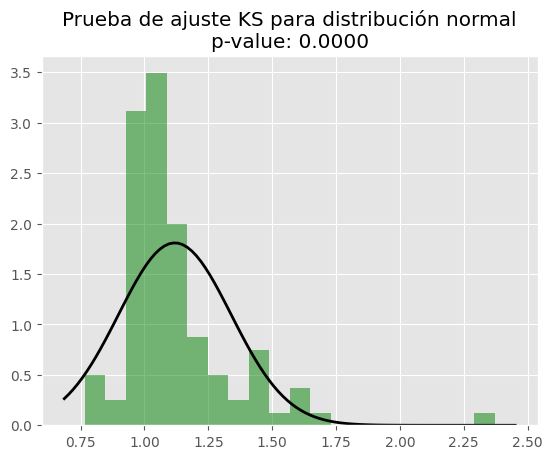

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm
from matplotlib import style

# Aplicar estilo ggplot
style.use('ggplot')

# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
df = pd.read_csv('tiempos_iteraciones.csv')

# Extraer la columna de interés
tiempos_iteracion = df['TiempoIteracion']

# Prueba de ajuste de Kolmogorov-Smirnov para distribución normal
kstest_result = kstest(tiempos_iteracion, 'norm')

# Visualizar histograma de los tiempos de iteración
plt.hist(tiempos_iteracion, bins=20, density=True, alpha=0.5, color='g')

# Visualizar la distribución normal ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, tiempos_iteracion.mean(), tiempos_iteracion.std())
plt.plot(x, p, 'k', linewidth=2)

# Mostrar la prueba de ajuste
plt.title(f'Prueba de ajuste KS para distribución normal\np-value: {kstest_result.pvalue:.4f}')

# Guardar la imagen en un archivo PNG
plt.savefig('histograma_tiempos.png')

# Mostrar el gráfico
plt.show()
